# Logistic Regression

Data info: Whether listed people bought an advertised SUV or not <br>
Targetted advertisement campaign<br>
Build a model to predict if a user is going to buy the SUV or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[: , [2,3]].values
y = data.iloc[: , -1].values

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Split train-test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=58)

In [5]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler(with_mean=False)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

c:\users\berk_\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
X_train

array([[1.73121946, 2.00333502],
       [5.48219496, 3.59421872],
       [4.52040637, 0.67759861],
       [3.07772349, 4.41912137],
       [4.52040637, 0.73652023],
       [3.7509755 , 1.23735398],
       [4.13569093, 3.80044438],
       [4.61658523, 2.65147282],
       [3.7509755 , 1.79710936],
       [3.7509755 , 2.20956069],
       [5.48219496, 1.76764855],
       [3.84715436, 2.09171745],
       [3.7509755 , 2.15063907],
       [2.69300805, 1.73818774],
       [3.36626006, 2.2684823 ],
       [4.42422751, 1.20789318],
       [4.32804865, 0.94274589],
       [4.42422751, 0.94274589],
       [2.59682919, 0.58921618],
       [4.61658523, 0.85436347],
       [2.30829261, 1.6203445 ],
       [4.42422751, 2.59255121],
       [1.73121946, 1.2962756 ],
       [1.92357718, 1.44357965],
       [2.01975604, 2.00333502],
       [2.50065033, 0.50083376],
       [4.03951208, 2.32740392],
       [3.94333322, 1.85603098],
       [3.55861778, 2.32740392],
       [4.61658523, 0.9722067 ],
       [4.

In [7]:
# Fitting Logistic Regression to the train set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [21]:
y_pred.dtype

dtype('int64')

In [22]:
pd.DataFrame({'act' : y_test,
             'pred' : y_pred})

,act,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,1,1
7,1,0
8,0,0
9,1,1


In [23]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

,0,1
0,50,3
1,7,20


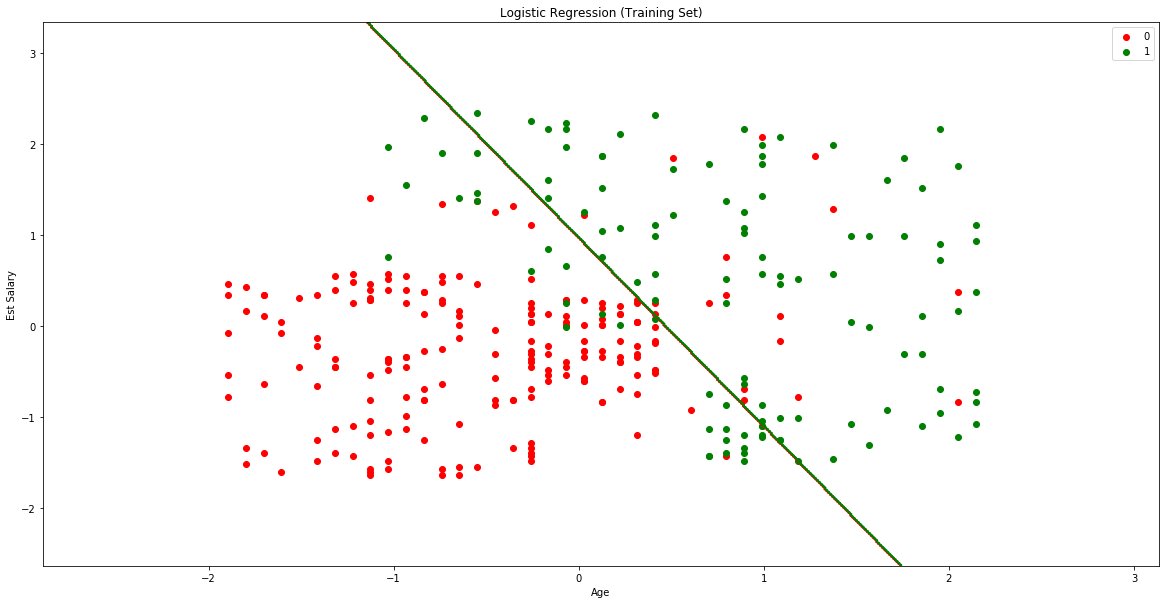

In [24]:
#Visualizing the Logistic Regression training test results

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1 , X2 = np.meshgrid(np.arange(start = X_set[: , 0].min() - 1, stop = X_set[: , 0].max() + 1, step = 0.01),
                      np.arange(X_set[: , 1].min() -1, X_set[:, 1].max()  +1, 0.01))
plt.figure(figsize = [20,10])
plt.contour(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 1, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0], X_set[y_set == j, 1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Est Salary')
plt.legend()
plt.show()


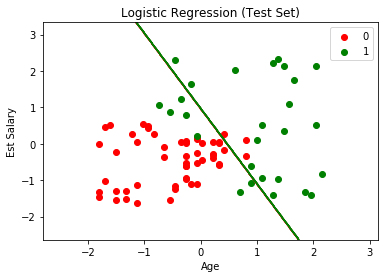

In [27]:
#Visualizing the Logistic Regression test set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1 , X2 = np.meshgrid(np.arange(start = X_set[: , 0].min() - 1, stop = X_set[: , 0].max() + 1, step = 0.01), #returns coordinate matrices
                      np.arange(X_set[: , 1].min() -1, X_set[:, 1].max()  +1, 0.01))
plt.contour(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 1, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0], X_set[y_set == j, 1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Est Salary')
plt.legend()
plt.show()